[[Model]]
    Model(expcloud)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 5
    # variables        = 2
    chi-square         = 1.1450e-12
    reduced chi-square = 3.8165e-13
    Akaike info crit   = -141.525486
    Bayesian info crit = -142.306610
    R-squared          = 0.99956765
[[Variables]]
    s0:  1.4617e-05 +/- 9.0908e-07 (6.22%) (init = 1e-05)
    T:   1.2550e-07 +/- 1.5559e-09 (1.24%) (init = 2e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(s0, T) = -0.5961
TDBW (Vertical):  525.66 nm
TDBW (Horizontal):  571.28 nm
[[Model]]
    Model(expcloud)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 5
    # variables        = 2
    chi-square         = 2.7330e-13
    reduced chi-square = 9.1099e-14
    Akaike info crit   = -148.688289
    Bayesian info crit = -149.469413
    R-squared          = 0.99985941
[[Variables]]
    s0:  2.1464e-05 +/- 3.41

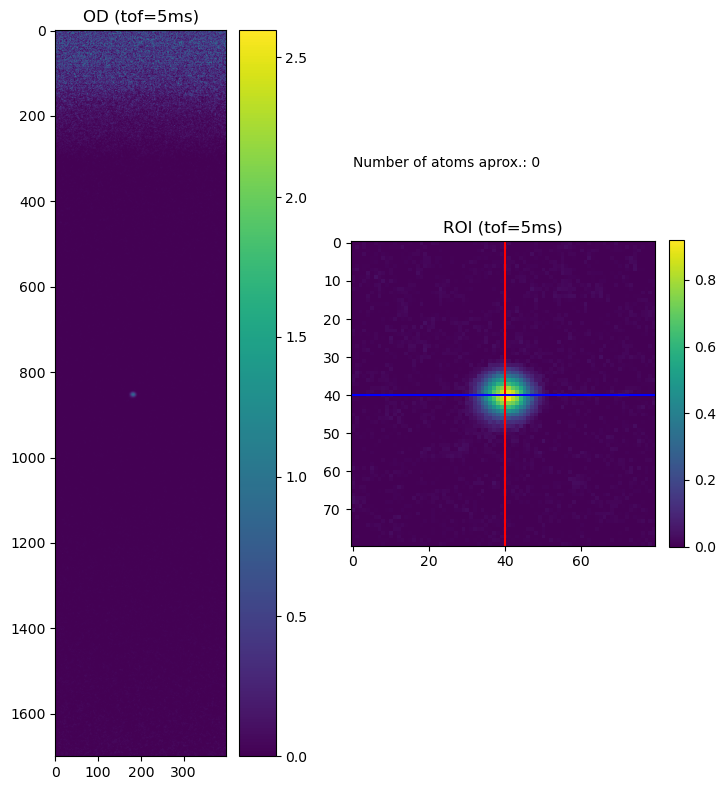

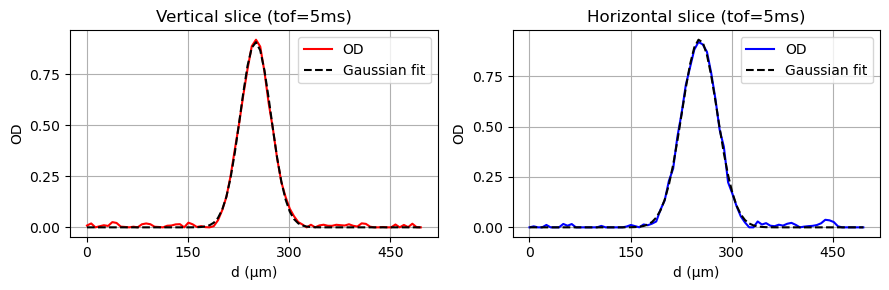

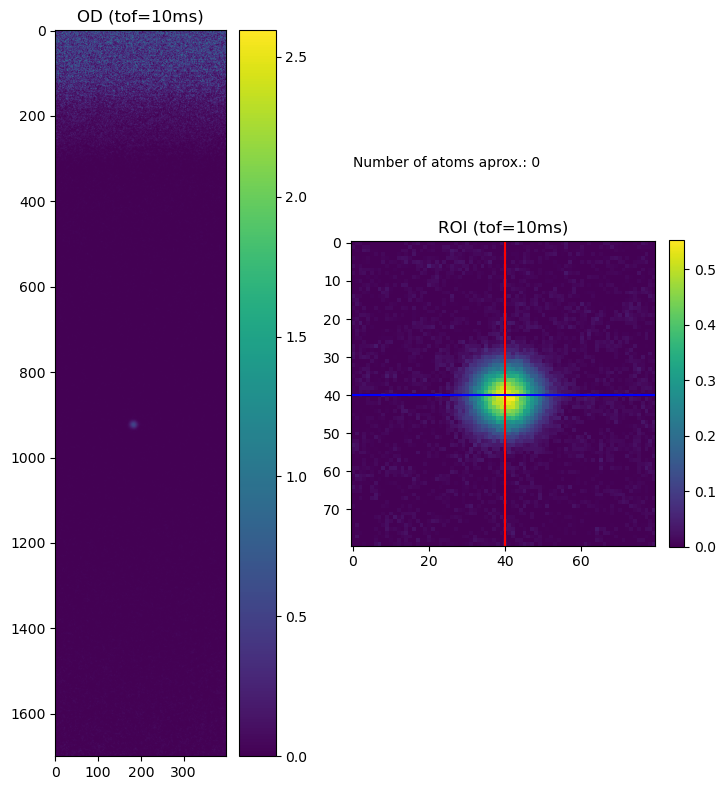

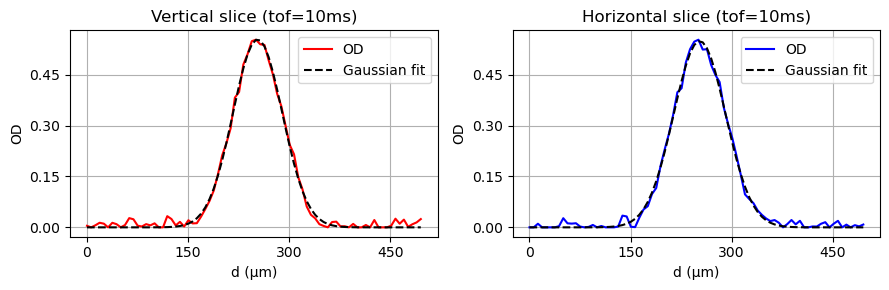

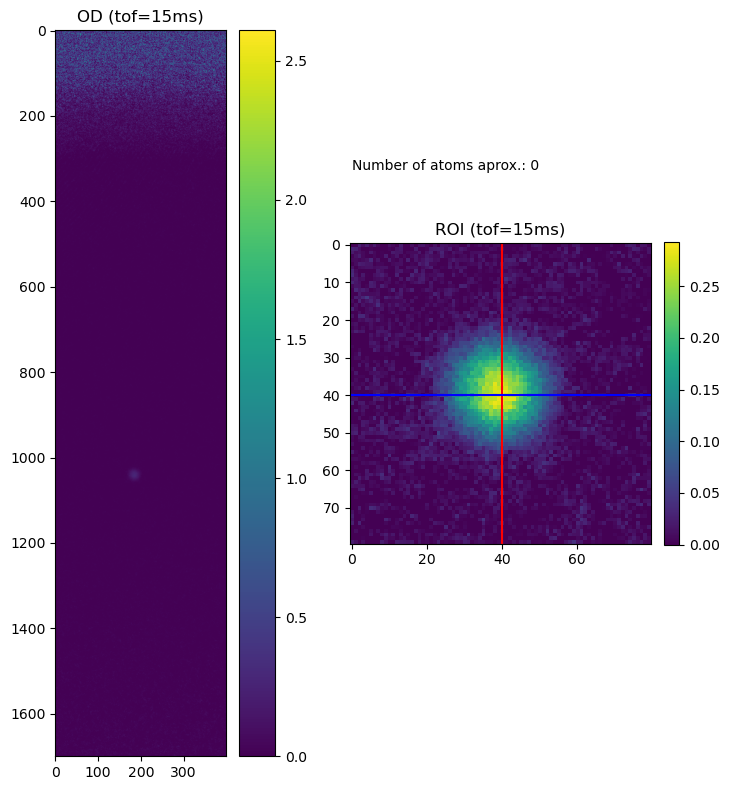

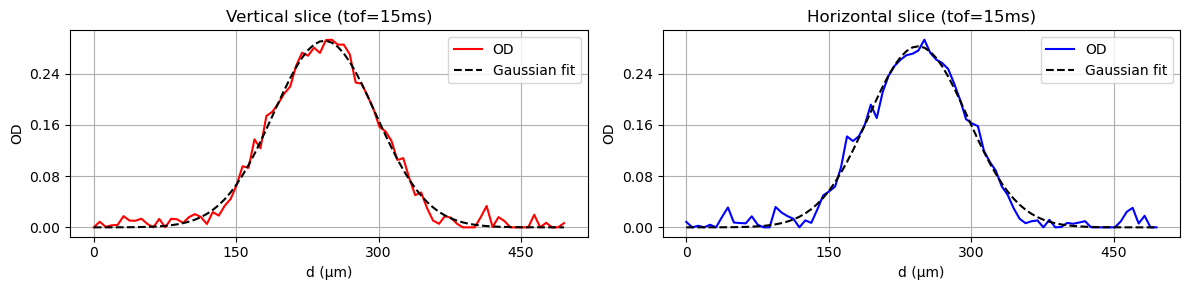

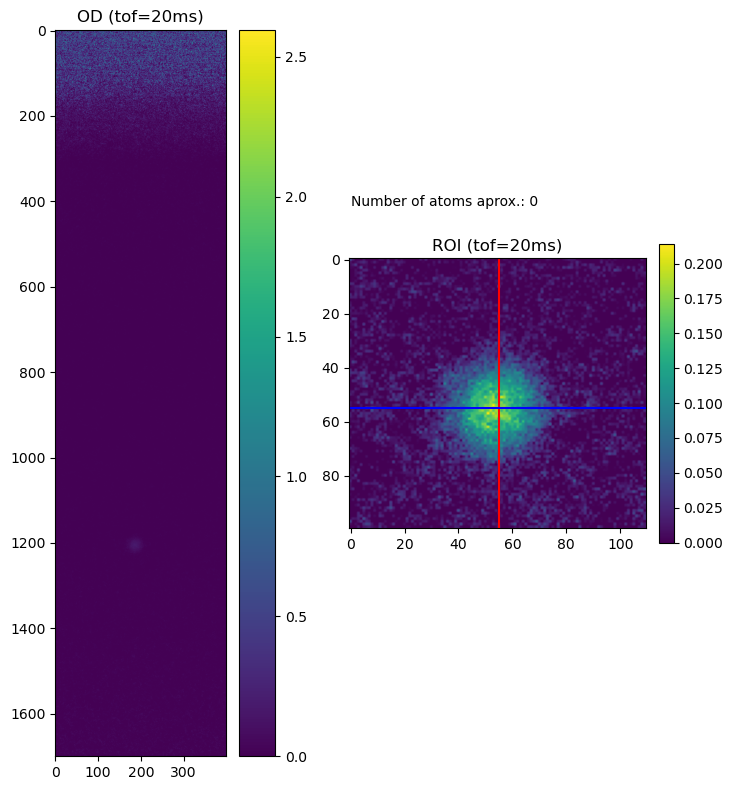

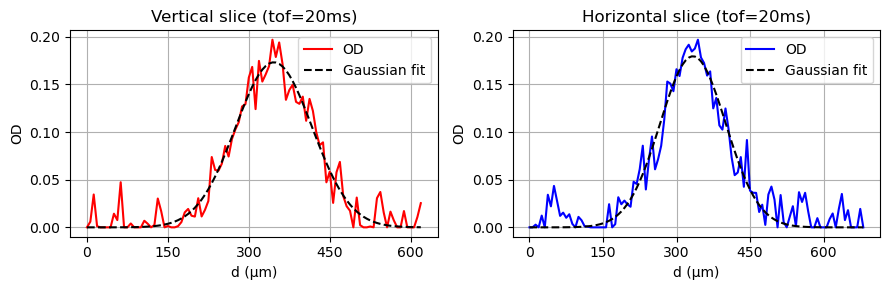

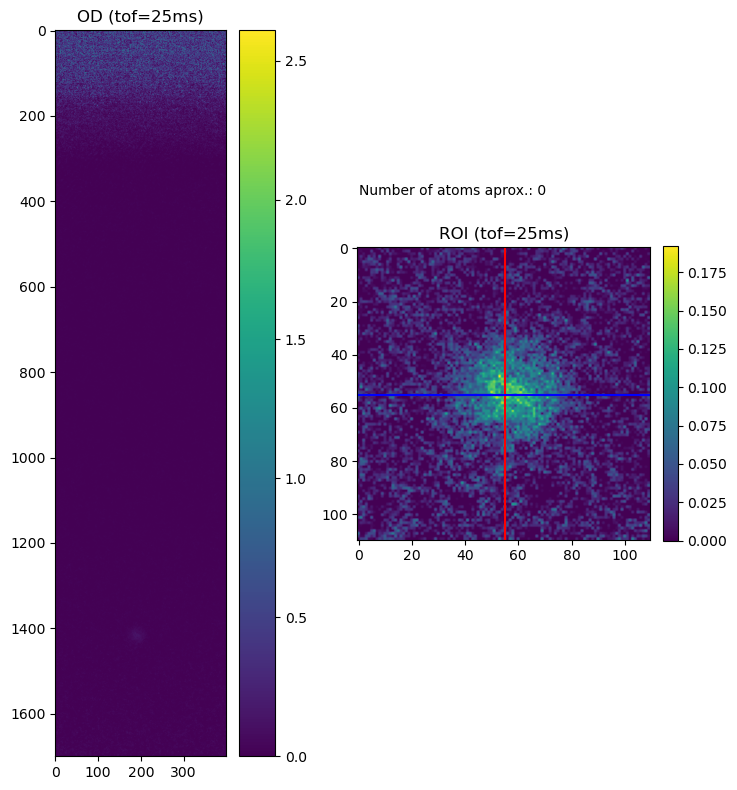

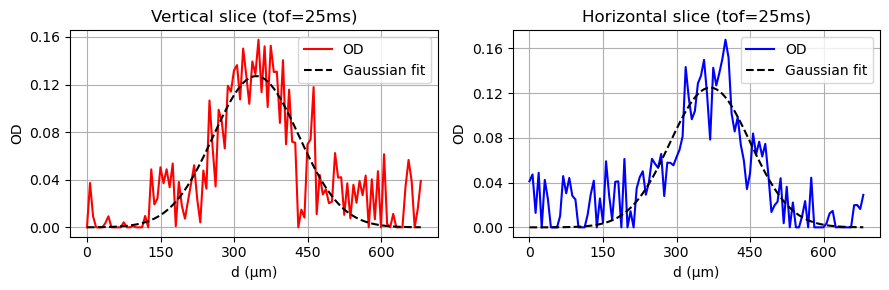

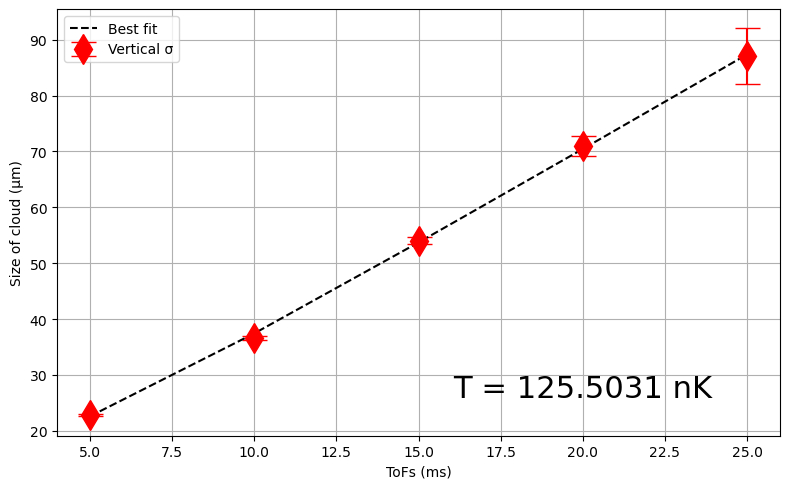

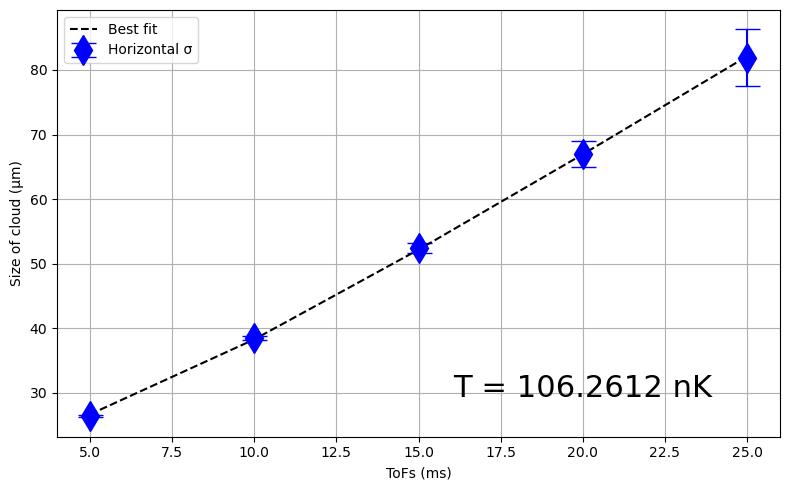

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
from lmfit import Model
from PIL import Image 
from matplotlib.ticker import MaxNLocator
from scipy.special import spence as li2
imgscale = 2**16 / 2.7
hb=6.626705e-34/(2*np.pi)
kb=1.380649e-23

def gaussianfit(x,y,c):
    mod=GaussianModel()
    if c==0: plt.plot(x,y,label='OD',color='red')
    if c==1: plt.plot(x,y,label='OD',color='blue')
    plt.grid(1)
    pars=mod.guess(y, x=x)
    out=mod.fit(y, pars, x=x)
    plt.plot(x,out.best_fit, label='Gaussian fit', linestyle='--', color='k')
    plt.legend(loc='upper right')
    plt.gca().xaxis.set_major_locator(MaxNLocator(5))
    plt.gca().yaxis.set_major_locator(MaxNLocator(5))
    return out

def rofi(n):
    x,y=np.unravel_index(np.argmax(n), n.shape)
    roi=n[max(x-round(sroi/2),0):min(x+round(sroi/2),n.shape[0]),max(y-round(sroi/2),0):min(y+round(sroi/2),n.shape[1])]
    hspos,vspos=np.unravel_index(np.argmax(roi), roi.shape)
    vs=roi[:,vspos]
    hs=roi[hspos,:]
    return roi,vs,vspos,hs,hspos

def tdbw(T,m): return np.sqrt((2*np.pi*hb*hb)/(m*kb*T))

#l=460.8e-9
#l=689e-9
hp=6.5e-6
wp=6.5e-6
mg=1.05
#s=(3*l*l)/(2*np.pi)
sv=[]
sv_err=[]
sh=[]
sh_err=[]
tofs=np.array([0.005,0.010,0.015,0.020,0.025])
sroi=80
hi=1700
wi=400

with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.005_0.1_7394695010.bin","rb") as dt1: im1=np.reshape(np.frombuffer(dt1.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.005_0.1_7394695014.bin","rb") as dt2: im2=np.reshape(np.frombuffer(dt2.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.005_0.1_7394695017.bin","rb") as dt3: im3=np.reshape(np.frombuffer(dt3.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.01_0.1_7394695022.bin","rb") as dt4: im4=np.reshape(np.frombuffer(dt4.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.01_0.1_7394695025.bin","rb") as dt5: im5=np.reshape(np.frombuffer(dt5.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.01_0.1_7394695028.bin","rb") as dt6: im6=np.reshape(np.frombuffer(dt6.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394695033.bin","rb") as dt7: im7=np.reshape(np.frombuffer(dt7.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394695036.bin","rb") as dt8: im8=np.reshape(np.frombuffer(dt8.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394695041.bin","rb") as dt9: im9=np.reshape(np.frombuffer(dt9.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394695046.bin","rb") as dt10: im10=np.reshape(np.frombuffer(dt10.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394695050.bin","rb") as dt11: im11=np.reshape(np.frombuffer(dt11.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394695053.bin","rb") as dt12: im12=np.reshape(np.frombuffer(dt12.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.025_0.1_7394695058.bin","rb") as dt13: im13=np.reshape(np.frombuffer(dt13.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.025_0.1_7394695064.bin","rb") as dt14: im14=np.reshape(np.frombuffer(dt14.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x1700_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.025_0.1_7394695067.bin","rb") as dt15: im15=np.reshape(np.frombuffer(dt15.read(),dtype=np.uint16),(wi,hi))

im1 = im1/imgscale
im2 = im2/imgscale
im3 = im3/imgscale
im4 = im4/imgscale
im5 = im5/imgscale
im6 = im6/imgscale
im7 = im7/imgscale
im8 = im8/imgscale
im9 = im9/imgscale
im10 = im10/imgscale
im11 = im11/imgscale
im12 = im12/imgscale
im13 = im13/imgscale 
im14 = im14/imgscale 
im15 = im15/imgscale 
OD1=(im1+im2+im3)/3
OD1=np.rot90(OD1,k=3)
OD1=np.maximum(OD1-np.mean(OD1[1400:1450,0:50]),0)
OD2=(im4+im5+im6)/3
OD2=np.rot90(OD2,k=3)
OD2=np.maximum(OD2-np.mean(OD2[1400:1450,0:50]),0)
OD3=(im7+im8+im9)/3
OD3=np.rot90(OD3,k=3)
OD3=np.maximum(OD3-np.mean(OD3[1400:1450,0:50]),0)
OD4=(im10+im11+im12)/3
OD4=np.rot90(OD4,k=3)
OD4=np.maximum(OD4-np.mean(OD4[1400:1450,0:50]),0)
OD5=(im13+im14+im15)/3
OD5=np.rot90(OD5,k=3)
OD5=np.maximum(OD5-np.mean(OD5[1400:1450,0:50]),0)


#5ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD1)
#plt.savefig('ode5ms.png', dpi=300)
plt.title('OD (tof=5ms)')
plt.colorbar(fraction=0.12, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD1[600:1500,0:400])
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='b')
plt.title('ROI (tof=5ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,-20,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs,0)
plt.title('Vertical slice (tof=5ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sv.append(out.params['sigma'].value)
sv_err.append(out.params['sigma'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs,1)
plt.title('Horizontal slice (tof=5ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sh.append(out.params['sigma'].value)
sh_err.append(out.params['sigma'].stderr)
plt.tight_layout()

#10ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD2)
#plt.savefig('ode10ms.png', dpi=300)
plt.title('OD (tof=10ms)')
plt.colorbar(fraction=0.12, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD2[600:1400,0:400])
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='b')
plt.title('ROI (tof=10ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,-20,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs,0)
plt.title('Vertical slice (tof=10ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sv.append(out.params['sigma'].value)
sv_err.append(out.params['sigma'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs,1)
plt.title('Horizontal slice (tof=10ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sh.append(out.params['sigma'].value)
sh_err.append(out.params['sigma'].stderr)
plt.tight_layout()

#15ms
#15ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD3)
plt.savefig('ode15ms.png', dpi=300)
plt.title('OD (tof=15ms)')
plt.colorbar(fraction=0.12, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD3[600:1500,0:400])
#roi=OD3[1010:1080,149:219]
#vspos=35
#hspos=35
#vs=roi[:,vspos]
#hs=roi[hspos,:]
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='b')
#plt.savefig('roi15ms.png', dpi=300)
plt.title('ROI (tof=15ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,-20,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(12,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs,0)
plt.title('Vertical slice (tof=15ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sv.append(out.params['sigma'].value)
sv_err.append(out.params['sigma'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs,1)
plt.title('Horizontal slice (tof=15ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sh.append(out.params['sigma'].value)
sh_err.append(out.params['sigma'].stderr)
plt.savefig('gauss15_2ms.png', dpi=300)
plt.tight_layout()

#20ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD4)
#plt.savefig('ode20ms.png', dpi=300)
plt.title('OD (tof=20ms)')
plt.colorbar(fraction=0.12, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD4[600:1600,0:400])
roi=OD4[1150:1250,133:243]
vspos=55
hspos=55
vs=roi[:,vspos]
hs=roi[hspos,:]
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='b')
plt.title('ROI (tof=20ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,-20,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs,0)
plt.title('Vertical slice (tof=20ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sv.append(out.params['sigma'].value)
sv_err.append(out.params['sigma'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs,1)
plt.title('Horizontal slice (tof=20ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sh.append(out.params['sigma'].value)
sh_err.append(out.params['sigma'].stderr)
plt.tight_layout()

#25ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD5)
#plt.savefig('ode25ms.png', dpi=300)
plt.title('OD (tof=25ms)')
plt.colorbar(fraction=0.12, pad=0.04)
plt.subplot(1,2,2)
#roi,vs,vspos,hs,hspos=rofi(OD5[400:1600,0:400])
roi=OD5[1363:1473,134:244]
vspos=55
hspos=55
vs=roi[:,vspos]
hs=roi[hspos,:]
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='b')
plt.title('ROI (tof=25ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,-20,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs,0)
plt.title('Vertical slice (tof=25ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sv.append(out.params['sigma'].value)
sv_err.append(out.params['sigma'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs,1)
plt.title('Horizontal slice (tof=25ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
sh.append(out.params['sigma'].value)
sh_err.append(out.params['sigma'].stderr)
plt.tight_layout()

#Sigma
def expcloud(tofs,s0,T): return np.sqrt(s0*s0+(kb*T*(tofs)*(tofs))/msr88)
kb=1.380649e-23
msr88=1.459706901e-25
s0=70e-6
T=12e-6
sv=(np.array(sv))/1e6
sv_err=(np.array(sv_err))/1e6
sh=(np.array(sh))/1e6
sh_err=(np.array(sh_err))/1e6
fig=plt.figure(figsize=(8,5))
mod=Model(expcloud)
params=mod.make_params()
params['s0'].set(value=10e-6,min=0,max=600e-6)
params['T'].set(value=20e-8,min=0,max=100e-6)
#plt.plot(tofs*1e3,sv*1e6,color='red',label='Vertical σ')
plt.errorbar(tofs*1e3,sv*1e6,yerr=sv_err*1e6,label='Vertical σ',fmt='d',mfc='red',mec='red',ecolor='red',ms=15,capsize=9)
out=mod.fit(sv,tofs=tofs,params=params)
plt.plot(tofs*1e3,out.best_fit*1e6,color='k',linestyle='--',label='Best fit')
plt.legend()
plt.xlabel('ToFs (ms)')
plt.ylabel('Size of cloud (μm)')
plt.grid(1)
T1=round(out.params['T'].value*1e9,4)
Tx1=f"T = {T1} nK"
plt.text(20,24.9,Tx1,fontsize=22,ha='center',va='bottom')
print(out.fit_report())
plt.tight_layout()
#plt.savefig('fitv.png', dpi=300)

fig=plt.figure(figsize=(8,5))
mod=Model(expcloud)
params=mod.make_params()
params['s0'].set(value=10e-6,min=0,max=600e-6)
params['T'].set(value=15e-8,min=0,max=100e-6)
#plt.plot(tofs*1e3,sh*1e6,color='blue',label='Horizontal σ')
plt.errorbar(tofs*1e3,sh*1e6,yerr=sh_err*1e6,label='Horizontal σ',fmt='d',mfc='blue',mec='blue',ecolor='blue',ms=15,capsize=9)
out=mod.fit(sh,tofs=tofs,params=params)
plt.plot(tofs*1e3,out.best_fit*1e6,color='k',linestyle='--',label='Best fit')
plt.legend()
plt.xlabel('ToFs (ms)')
plt.ylabel('Size of cloud (μm)')
plt.grid(1)
T2=round(out.params['T'].value*1e9,4)
Tx2=f"T = {T2} nK"
plt.text(20,28.5,Tx2,fontsize=22,ha='center',va='bottom')
print("TDBW (Vertical): ", round(tdbw(T1/1e9,msr88),11)*1e9, "nm")
print("TDBW (Horizontal): ", round(tdbw(T2/1e9,msr88),11)*1e9,"nm")
print(out.fit_report())
plt.tight_layout()
plt.show()

9.999999793720061 1.2669912210516758
T/T_F= (0.3041933382627798, 0.008, -0.01)


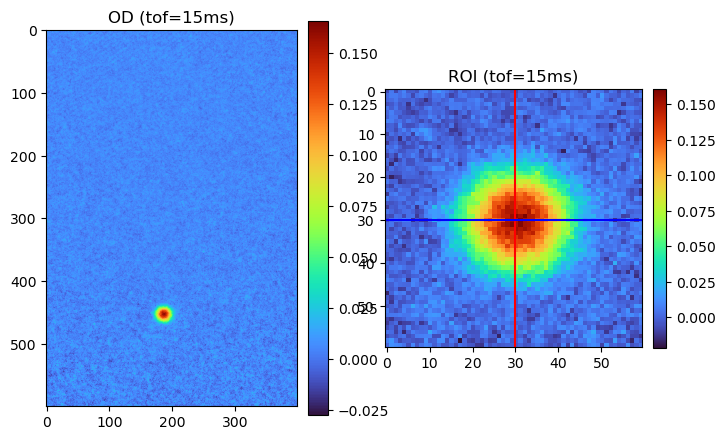

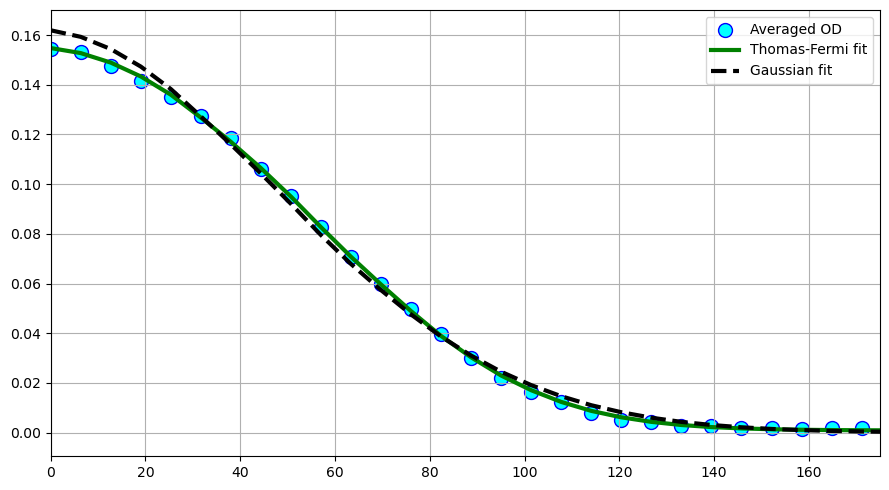

In [41]:
import mpmath as mp
from lmfit.models import GaussianModel, Gaussian2dModel
from lmfit import Model, Parameters, report_fit
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
from lmfit import Model
from PIL import Image 
from matplotlib.ticker import MaxNLocator
from mpmath import polylog as Polylog
imgscale = 2**16 / 2.7

def Li3(z):
    return Polylog(3,-z)
def Li3_v(z):
    f = np.vectorize(Li3,otypes=[complex])
    return f(z).real
def Degeneracy(z):
    p=Li3_v(z)
    return (-1/(6.*p))**.3333333
    
def gaussianfit(x,y,c):
    mod=GaussianModel()
    #if c==0: plt.plot(x,y,label='OD',color='red')
    #if c==1: plt.plot(x,y,label='OD',color='blue')
    plt.grid(1)
    pars=mod.guess(y, x=x)
    out=mod.fit(y, pars, x=x)
    plt.plot(x,out.best_fit, label='Gaussian fit', linestyle='--',linewidth=2, color='g')
    plt.legend(loc='upper right')
    plt.gca().xaxis.set_major_locator(MaxNLocator(5))
    plt.gca().yaxis.set_major_locator(MaxNLocator(5))
    print(out.fit_report())
    return out

def Li2_int(x):
    if isinstance(x, (int, float)):
        # Si x es un número (int o float), no es iterable
        return A * float(mp.re(mp.polylog(2, x)))
    else:
        # Si x es una matriz (lista de listas o array de numpy)
        y = []
        for row in x:
            y_row = []
            for i in row:
                y_row.append(A * float(mp.re(mp.polylog(2, i))))
            y.append(y_row)
        y = np.array(y)
        return y

def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)
    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

def FermiDistribution(x,y, z, A, 
                      sigma_x, sigma_y, 
                      xc, yc, offset=0  ):
    f= offset+A*Li2_int(-z*np.exp(-(x-xc)**2./(2.*sigma_x**2.)-\
                                  (y-yc)**2/(2.*sigma_y**2.)))/Li2_int(-z)
    return f

def Deg_Er(z, z_err):
    print(z, z_err)
    degeneracy = Degeneracy(z)
    deg_err_p = degeneracy-Degeneracy(z+z_err)
    deg_err_m = degeneracy-Degeneracy(z-z_err)
    return degeneracy,np.round(deg_err_p,3),np.round(deg_err_m,3)

wi=400
hi=600

with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697281.bin","rb") as dt1: im1=np.reshape(np.frombuffer(dt1.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697283.bin","rb") as dt2: im2=np.reshape(np.frombuffer(dt2.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697286.bin","rb") as dt3: im3=np.reshape(np.frombuffer(dt3.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697289.bin","rb") as dt4: im4=np.reshape(np.frombuffer(dt4.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697291.bin","rb") as dt5: im5=np.reshape(np.frombuffer(dt5.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697294.bin","rb") as dt6: im6=np.reshape(np.frombuffer(dt6.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697297.bin","rb") as dt7: im7=np.reshape(np.frombuffer(dt7.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697299.bin","rb") as dt8: im8=np.reshape(np.frombuffer(dt8.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697302.bin","rb") as dt9: im9=np.reshape(np.frombuffer(dt9.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697304.bin","rb") as dt10: im10=np.reshape(np.frombuffer(dt10.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697307.bin","rb") as dt11: im11=np.reshape(np.frombuffer(dt11.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697310.bin","rb") as dt12: im12=np.reshape(np.frombuffer(dt12.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697312.bin","rb") as dt13: im13=np.reshape(np.frombuffer(dt13.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697249.bin","rb") as dt14: im14=np.reshape(np.frombuffer(dt14.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697252.bin","rb") as dt15: im15=np.reshape(np.frombuffer(dt15.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697255.bin","rb") as dt16: im16=np.reshape(np.frombuffer(dt16.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697257.bin","rb") as dt17: im17=np.reshape(np.frombuffer(dt17.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697260.bin","rb") as dt18: im18=np.reshape(np.frombuffer(dt18.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697263.bin","rb") as dt19: im19=np.reshape(np.frombuffer(dt19.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697265.bin","rb") as dt20: im20=np.reshape(np.frombuffer(dt20.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697268.bin","rb") as dt21: im21=np.reshape(np.frombuffer(dt21.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697270.bin","rb") as dt22: im22=np.reshape(np.frombuffer(dt22.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697273.bin","rb") as dt23: im23=np.reshape(np.frombuffer(dt23.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697276.bin","rb") as dt24: im24=np.reshape(np.frombuffer(dt24.read(),dtype=np.uint16),(wi,hi))
with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.02_0.1_7394697278.bin","rb") as dt25: im25=np.reshape(np.frombuffer(dt25.read(),dtype=np.uint16),(wi,hi))
# with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394696902.bin","rb") as dt26: im26=np.reshape(np.frombuffer(dt26.read(),dtype=np.uint16),(wi,hi))
# with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394696905.bin","rb") as dt27: im27=np.reshape(np.frombuffer(dt27.read(),dtype=np.uint16),(wi,hi))
# with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394696907.bin","rb") as dt28: im28=np.reshape(np.frombuffer(dt28.read(),dtype=np.uint16),(wi,hi))
# with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394696909.bin","rb") as dt29: im29=np.reshape(np.frombuffer(dt29.read(),dtype=np.uint16),(wi,hi))
# with open("2024-08-05_400x600_idx1_Clock_Measurements(p=TOF,Voltage497,)#0.015_0.1_7394696912.bin","rb") as dt30: im30=np.reshape(np.frombuffer(dt30.read(),dtype=np.uint16),(wi,hi))

im1 = im1/imgscale-0.1
im2 = im2/imgscale-0.1
im3 = im3/imgscale-0.1
im4 = im4/imgscale-0.1
im5 = im5/imgscale-0.1
im6 = im6/imgscale-0.1
im7 = im7/imgscale-0.1
im8 = im8/imgscale-0.1
im9 = im9/imgscale-0.1
im10 = im10/imgscale-0.1
im11 = im11/imgscale-0.1
im12 = im12/imgscale-0.1
im13 = im13/imgscale-0.1
im14 = im14/imgscale-0.1
im15 = im15/imgscale-0.1
im16 = im16/imgscale-0.1
im17 = im17/imgscale-0.1
im18 = im18/imgscale-0.1
im19 = im19/imgscale-0.1
im20 = im20/imgscale-0.1 
im21 = im21/imgscale-0.1 
im22 = im22/imgscale-0.1
im23 = im23/imgscale-0.1 
im24 = im24/imgscale-0.1
im25 = im25/imgscale-0.1
# im26 = im26/imgscale-0.1 
# im27 = im27/imgscale-0.1 
# im28 = im28/imgscale-0.1
# im29 = im29/imgscale-0.1 
# im30 = im30/imgscale-0.1
OD=(im1+im2+im3+im4+im5+im6+im7+im8+im9+im10+im11+im12+im13+im14+im15+im16+im17+im18+im19+im20+im21+im22+im23+im24+im25)/25
#OD=(im1+im2+im3+im4+im5+im6+im7+im8+im9+im10+im11+im12+im13+im14+im15+im16+im17+im18+im19+im20+im21+im22+im23+im24+im25+im26+im27+im28+im29+im30)/30
OD=np.rot90(OD,k=3)
#OD=np.maximum(OD-np.mean(OD[0:100,0:100]),0)
#OD=OD-np.mean(OD[0:100,0:100])

fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD,cmap='turbo')
plt.title('OD (tof=15ms)')
plt.colorbar(fraction=0.07, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD)
roi=OD[423:483,157:217]
roi=roi-np.mean(roi[0:10,0:10])
vspos=30
hspos=30
vs=roi[:,vspos]
hs=roi[hspos,:]
plt.imshow(roi,cmap='turbo')
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='b')
plt.title('ROI (tof=15ms)')
plt.colorbar(fraction=0.046, pad=0.04)

#fig=plt.figure(figsize=(9,4))


#Gaussian
gmodel = Gaussian2dModel()
params = Parameters()
params.add_many(('amplitude',0.11),
                ('centerx',vspos),
                ('centery',hspos),
                ('sigmax',10),
                ('sigmay',10))

x=np.arange(0,roi.shape[1],1)
y=np.arange(0,roi.shape[0],1)
xx,yy = np.meshgrid(x,y)
gresult = gmodel.fit(roi, x=xx, y=yy, params=params)
gresult.params
#plt.ylim(0)
#plt.xlim(0)

#Fermi
model = Model(FermiDistribution,independent_vars=['x','y'])
A=gresult.params['amplitude'].value/(gresult.params['sigmax'].value*gresult.params['sigmay'].value*(2*np.pi))
xc=gresult.params['centerx'].value
yc=gresult.params['centery'].value
sigma_x=gresult.params['sigmax'].value
sigma_y=gresult.params['sigmax'].value
params = Parameters()
params.add_many(('A',A,True, 0, 1e6),
                ('xc',xc,True, 0, vspos*2),
                ('yc',yc,True, 0, hspos*2),
                ('sigma_x',sigma_x,True, 0, 100),
                ('sigma_y',sigma_y,True, 0, 100),
                ('offset',0,True, -1, 1),
                ('z',1,True, 0, 10))
res=model.fit(roi,params=params,x=xx,y=yy)

ODrad = radial_profile(roi, [30,30])
fig=plt.figure(figsize=(9,5))
#ax.plot(radial_profile(model.func(xx,yy, **res.best_values),(xc,yc)),c='r')
print('T/T_F=', Deg_Er(res.params['z'].value,res.params['z'].stderr))
#print('T/T_F=', Degeneracy(res.params['z'].value))
#res.params
y1=radial_profile(model.func(xx,yy, **res.best_values),(xc,yc))
y2=radial_profile(gmodel.func(xx,yy, **gresult.best_values),(xc,yc))
xp=np.linspace(0,(len(y1)*hp*1e6)/mg,len(y1))
plt.scatter(xp,radial_profile(roi,(xc,yc)),label='Averaged OD',s=100,edgecolor='blue',facecolor='cyan')
plt.plot(xp,y1,label='Thomas-Fermi fit',color='green',linewidth=3,)
plt.plot(xp,y2,label='Gaussian fit',linestyle='--', linewidth=3, c='k')
plt.grid(1)
plt.legend()
plt.xlim(0,175)
plt.savefig('dfg.png', dpi=300)

plt.tight_layout()
plt.show()

(0.0, 0.00034047619047619047)

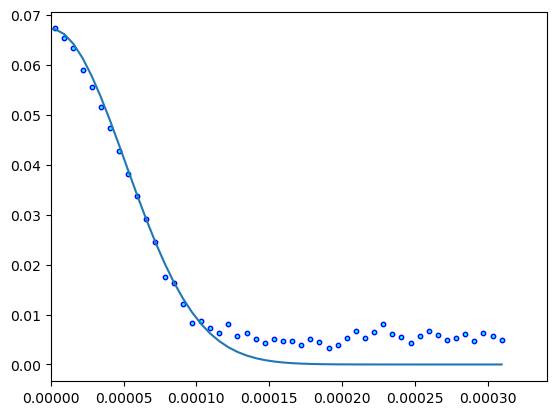

In [240]:
A=-2.4e-1
z=3e-1
a=70e-6
x=np.linspace(-(hspos*wp)/mg,(hspos*wp)/mg,len(ODrad))
plt.scatter(x, ODrad, s=10,edgecolor='blue',facecolor='cyan')
plt.plot(x,dfit(x,A,z,a))
plt.xlim(0)
